## E1 Solution with statsmodels

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
# MAPE function

In [5]:
def mean_absolute_percentage_error(y,y_pred): 
    y  = np.array(y)
    y_pred = np.array(y_pred)
    return 100*np.mean(np.abs((y-y_pred)/y))

In [6]:
df = pd.read_excel('sce.xlsx', sheet_name = 'Sheet1')
df.head()

,Date,Load,temp
0,2014-01-01 00:00:00,9891.0,59.4685
1,2014-01-01 01:00:00,9553.0,61.4030
2,2014-01-01 02:00:00,9222.0,55.0310
3,2014-01-01 03:00:00,9024.0,53.1878
4,2014-01-01 04:00:00,8987.0,51.9944


In [7]:
df.shape

(49680, 3)

### 1. Regression Model with year, month, day, and hour

In [8]:
# split column Date

In [9]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['hour'] = df['Date'].dt.hour
df['dayofweek'] = df['Date'].dt.dayofweek
df[:5]

,Date,Load,temp,year,month,day,hour,dayofweek
0,2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2
1,2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2
2,2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2
3,2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2
4,2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2


In [10]:
df['month'] = df['month'].astype(object)
df['day'] = df['day'].astype(object)
df['hour'] = df['hour'].astype(object)
df['dayofweek'] = df['dayofweek'].astype(object)
df.dtypes

Date         datetime64[ns]
Load                float64
temp                float64
year                  int64
month                object
day                  object
hour                 object
dayofweek            object
dtype: object

In [11]:
# Make column Date as the dataframe Index

In [12]:
df.set_index('Date',inplace = True)
df[:5]

,Load,temp,year,month,day,hour,dayofweek
Date,,,,,,,
2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2
2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2
2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2
2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2
2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2


In [13]:
y = df['Load']

In [14]:
m1 = smf.ols(formula = 'Load ~ year + month + day + hour + dayofweek',data=df).fit()
m1.rsquared

0.730834240282995

In [15]:
yhat = m1.predict(df)
mean_absolute_percentage_error(y,yhat)

8.069690608001272

### 2. Plot Load vs time

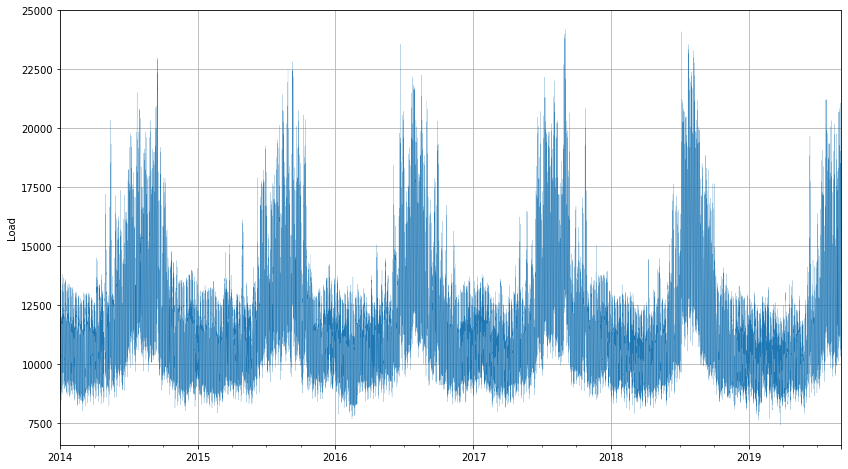

In [16]:
df['Load'].plot(figsize = (14,8),lw=0.15)
plt.ylabel('Load')
plt.xlabel('')
plt.grid();

### 3. Scatterplot Load vs Temperature

In [17]:
poly = df['temp'].values.reshape(-1,1)
poly_model = PolynomialFeatures(degree=4)
poly2 = poly_model.fit_transform(poly)
model = LinearRegression().fit(poly2,df['Load'])
yhat   = model.predict(poly2)

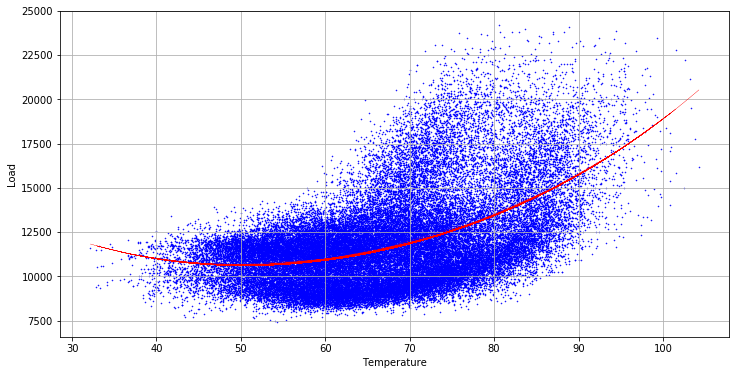

In [18]:
plt.figure(figsize = (12,6))
plt.scatter(df['temp'],df['Load'],c='b',s=0.3)
plt.plot(df['temp'],yhat,c='r',lw=0.2)
plt.xlabel('Temperature')
plt.ylabel('Load')
plt.grid()

### 4. Regression Model with Interactions temp with hour

In [19]:
df['temp2'] = df['temp']**2
df[:5]

,Load,temp,year,month,day,hour,dayofweek,temp2
Date,,,,,,,,
2014-01-01 00:00:00,9891.0,59.4685,2014,1,1,0,2,3536.502492
2014-01-01 01:00:00,9553.0,61.4030,2014,1,1,1,2,3770.328409
2014-01-01 02:00:00,9222.0,55.0310,2014,1,1,2,2,3028.410961
2014-01-01 03:00:00,9024.0,53.1878,2014,1,1,3,2,2828.942069
2014-01-01 04:00:00,8987.0,51.9944,2014,1,1,4,2,2703.417631


In [20]:
m4 = smf.ols(formula = 'Load ~ year + month + day + hour +\
                        dayofweek + temp*hour + temp2*hour',
             data=df).fit()
m4.rsquared

0.8985126605900583

In [21]:
yhat = m4.predict(df)
mean_absolute_percentage_error(y,yhat)

5.171918662655043

### 5. Regression Model with lag24

In [22]:
# add lag24 to original dataframe df

In [23]:
df['lag24'] = df['Load'].shift(24)

In [24]:
# remove NaNs from a copy of df

In [25]:
df5 = df.copy()
df5.dropna(inplace = True)
y = df5['Load']
df5.head()

,Load,temp,year,month,day,hour,dayofweek,temp2,lag24
Date,,,,,,,,,
2014-01-02 00:00:00,9191.0,68.0000,2014,1,2,0,3,4624.000000,9891.0
2014-01-02 01:00:00,8860.0,61.5641,2014,1,2,1,3,3790.138409,9553.0
2014-01-02 02:00:00,8682.0,57.2234,2014,1,2,2,3,3274.517508,9222.0
2014-01-02 03:00:00,8676.0,54.9374,2014,1,2,3,3,3018.117919,9024.0
2014-01-02 04:00:00,8917.0,54.9734,2014,1,2,4,3,3022.074708,8987.0


In [26]:
m5 = smf.ols(formula = 'Load ~ year + month + day + hour + lag24+\
                        dayofweek + temp*hour + temp2*hour',
             data=df5).fit()
m5.rsquared

0.9409536275110548

In [27]:
yhat = m5.predict(df5)
mean_absolute_percentage_error(y,yhat)

3.8437939643399006

### 6. Regression Model with additional lags

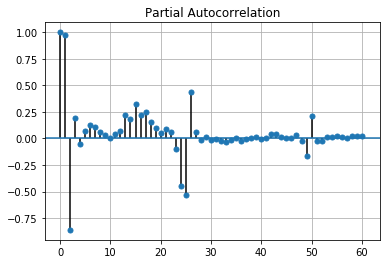

In [28]:
sm.graphics.tsa.plot_pacf(df['Load'], lags = 60)
plt.grid();

In [29]:
# add lag15 to original dataframe df
df['lag15'] = df['Load'].shift(15)

In [30]:
df6 = df.copy()
df6.dropna(inplace = True)
y = df6['Load']
df6.head()

,Load,temp,year,month,day,hour,dayofweek,temp2,lag24,lag15
Date,,,,,,,,,,
2014-01-02 00:00:00,9191.0,68.0000,2014,1,2,0,3,4624.000000,9891.0,9180.0
2014-01-02 01:00:00,8860.0,61.5641,2014,1,2,1,3,3790.138409,9553.0,9330.0
2014-01-02 02:00:00,8682.0,57.2234,2014,1,2,2,3,3274.517508,9222.0,9361.0
2014-01-02 03:00:00,8676.0,54.9374,2014,1,2,3,3,3018.117919,9024.0,9376.0
2014-01-02 04:00:00,8917.0,54.9734,2014,1,2,4,3,3022.074708,8987.0,9371.0


In [31]:
m6 = smf.ols(formula = 'Load ~ year + month + day + hour +\
                                lag24 + lag15 +\
                        dayofweek + temp*hour + temp2*hour',
             data=df6).fit()
m6.rsquared

0.9420231337191148

In [32]:
yhat = m6.predict(df6)
mean_absolute_percentage_error(y,yhat)

3.845162607509036

In [33]:
# add lag7days to original dataframe df
df['lag7day'] = df['Load'].shift(24*7)

In [34]:
df6 = df.copy()
df6.dropna(inplace = True)
y = df6['Load']
df6.head()

,Load,temp,year,month,day,hour,dayofweek,temp2,lag24,lag15,lag7day
Date,,,,,,,,,,,
2014-01-08 00:00:00,9531.0,64.0373,2014,1,8,0,2,4100.775791,9351.0,11860.0,9891.0
2014-01-08 01:00:00,9261.0,61.1816,2014,1,8,1,2,3743.188179,9008.0,11950.0,9553.0
2014-01-08 02:00:00,9143.0,58.5185,2014,1,8,2,2,3424.414842,8815.0,11998.0,9222.0
2014-01-08 03:00:00,9097.0,57.7022,2014,1,8,3,2,3329.543885,8755.0,11968.0,9024.0
2014-01-08 04:00:00,9184.0,57.3026,2014,1,8,4,2,3283.587967,8990.0,11954.0,8987.0


In [35]:
m7 = smf.ols(formula = 'Load ~ year + month + day + hour +\
                                lag24 + lag15 + lag7day +\
                        dayofweek + temp*hour + temp2*hour',
             data=df6).fit()
m7.rsquared

0.9455565724195194

In [36]:
yhat = m7.predict(df6)
mean_absolute_percentage_error(y,yhat)

3.6527632322593275

### 7. Model with Cross Validation

In [37]:
df_train = df6['2014-01-01':'2018-12-31']
df_test = df6['2019-01-01':'2019-12-31']
y_test = df_test['Load']

In [38]:
model = smf.ols(formula = 'Load ~ year + month + day + hour +\
                                lag24 + lag15 + lag7day +\
                        dayofweek + temp*hour + temp2*hour',
                data=df_train).fit()
model.rsquared

0.9453802010278637

In [39]:
# MAE from Cross validation

In [40]:
yhat = model.predict(df_test)
mean_absolute_percentage_error(y_test,yhat)

3.91577289226308

### 8. Seasonal chart

In [41]:
pivot1 = df.pivot_table('Load',index = 'month',columns = 'year',
                        aggfunc = sum)
pivot1

year,2014,2015,2016,2017,2018,2019
month,,,,,,
1,8.125121e+06,7.948139e+06,7.890403e+06,8241383.80,7.893475e+06,7674611.0
2,7.115328e+06,7.069667e+06,7.203334e+06,7169334.00,7.078015e+06,7044857.0
3,7.880222e+06,8.251539e+06,7.970582e+06,7772633.70,7.599821e+06,7426485.1
4,7.834732e+06,7.826198e+06,7.918706e+06,7649655.82,7.468079e+06,7463246.8
5,8.938985e+06,8.034828e+06,8.235517e+06,8369397.86,8.038964e+06,7594325.0
6,9.067417e+06,9.219019e+06,9.732516e+06,9432457.70,8.735698e+06,8294990.0
7,1.076457e+07,9.941227e+06,1.089069e+07,11050385.50,1.168318e+07,10077470.4
8,1.048651e+07,1.077403e+07,1.086740e+07,11100572.50,1.147829e+07,10520454.9
9,1.022190e+07,1.034573e+07,9.378533e+06,9607095.63,9.343093e+06,335328.0


In [42]:
pivot1.loc[:,2014]

month
1     8.125121e+06
2     7.115328e+06
3     7.880222e+06
4     7.834732e+06
5     8.938985e+06
6     9.067417e+06
7     1.076457e+07
8     1.048651e+07
9     1.022190e+07
10    9.101137e+06
11    7.790181e+06
12    8.191214e+06
Name: 2014, dtype: float64

In [43]:
year = list(range(2014,2019))
year

[2014, 2015, 2016, 2017, 2018]

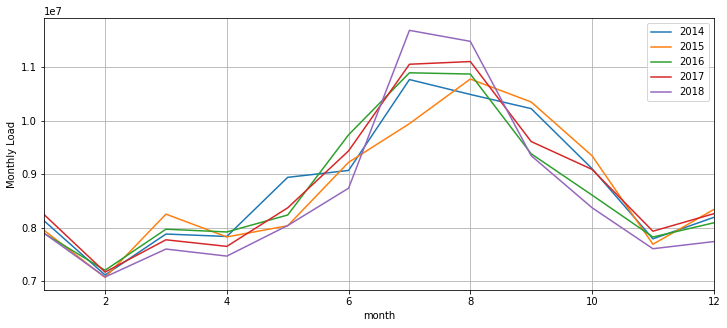

In [44]:
# plot curves one by one
for j in year:
    pivot1.loc[:,j].plot(figsize = (12,5))
plt.legend(year)
plt.ylabel('Monthly Load')
plt.grid();

#### change months numbers to month names (not required)

In [45]:
import calendar as cal

In [46]:
names = []
for j in range(1,13):
    names.append(cal.month_abbr[j])
names

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [47]:
x1 = list(range(1,13))
x1

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

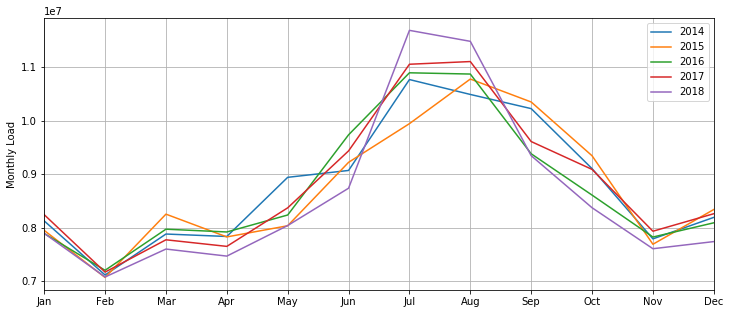

In [48]:
# plot curves one by one
for j in year:
    pivot1.loc[:,j].plot(figsize = (12,5))
plt.legend(year)
plt.ylabel('Monthly Load')
plt.xlabel('')
# month names on x-axis
plt.xticks(x1,names, rotation=0)
plt.grid();